<a href="https://colab.research.google.com/github/jbouhadana13/Data-Mining-Projects/blob/main/ACT_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1 (5 Points)

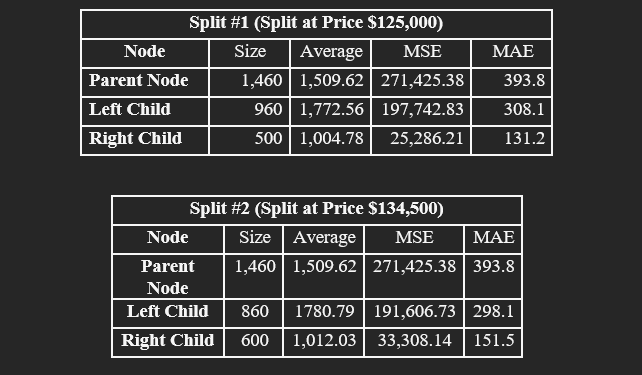

a)	Calculate both splits MSE and MAE reduction

1. MSE Reduction "for Split #1":

2. MSE Reduction "for Split #2":

3. MAE Reduction "for Split #1":

4. MAE Reduction "for Split #1":

b)	Which split perform better?


In [ ]:
#problem 1- Maria

import pandas as pd

#dataframe for split #1
data1 = [['Parent Node', 1460, 1509.62, 271425.38, 393.8], ['Left Child', 960, 1772.56, 197742.83, 308.1], ['Right Child', 500, 1004.78, 25286.21, 131.2]]

split1 = pd.DataFrame(data1, columns=['Node', 'Size', 'Average', 'MSE', 'MAE'])

print('Split #1 (Split at price $125,000)')
print(split1)


print(" ")


#dataframe for split #2
data2 = [['Parent Node', 1460, 1509.62, 271425.38, 393.8], ['Left Child', 860, 1780.79, 191606.73, 298.1], ['Right Child', 600, 1012.03, 33308.14, 151.5]]

split2 = pd.DataFrame(data2, columns=['Node', 'Size', 'Average', 'MSE', 'MAE'])

print('Split #2 (Split at price $134,500)')
print(split2)



In [ ]:
# 1a- calculate MSE and MAE reduction

#how to call on a specific cell in a dataframe
#print(split1.iloc[0]['MSE'])


# 1a.1- MSE Reduction "for Split #1"
mse_red1 = split1.iloc[0]['MSE'] - ( (split1.iloc[1]['Size']/split1.iloc[0]['Size'])*split1.iloc[1]['MSE'] + (split1.iloc[2]['Size']/split1.iloc[0]['Size'])*split1.iloc[2]['MSE'])
print('MSE reduction for split #1: ', mse_red1)

# 1a.2- MSE Reduction "for Split #2"
mae_red1 = split1.iloc[0]['MAE'] - ( (split1.iloc[1]['Size']/split1.iloc[0]['Size'])*split1.iloc[1]['MAE'] + (split1.iloc[2]['Size']/split1.iloc[0]['Size'])*split1.iloc[2]['MAE'])
print('MAE reduction for split #1: ', mae_red1)

# 1a.3- MAE Reduction "for Split #1"
mse_red2 = split2.iloc[0]['MSE'] - ( (split2.iloc[1]['Size']/split2.iloc[0]['Size'])*split2.iloc[1]['MSE'] + (split2.iloc[2]['Size']/split2.iloc[0]['Size'])*split2.iloc[2]['MSE'])
print('MSE reduction for split #2: ', mse_red2)

# 1a.4- MAE Reduction "for Split #2"
mae_red1 = split1.iloc[0]['MAE'] - ( (split2.iloc[1]['Size']/split2.iloc[0]['Size'])*split2.iloc[1]['MAE'] + (split2.iloc[2]['Size']/split2.iloc[0]['Size'])*split2.iloc[2]['MAE'])
print('MAE reduction for split #2: ', mae_red1)

1b- Split #2 had the highest MSE reduction (144872.86506849315) and, therefore, performed better than split #1 (132743.0363013699).

Split #2 had the highest MAE reduction (155.94657534246576) and, therefore, performed better than split #1 (146.28219178082193).

Overall, split #2 performed better than split #1.

Problem 2 Growing in Decision Trees (15 Points)


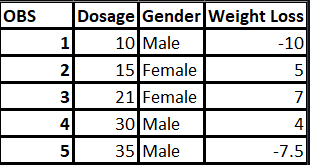

1.	What is the mean squared error for the root node?

2. 	How many splits can use the predictor “Dosage”?  Calculate the MSE for each candidate split using “Dosage”.  What is the best split using the predictor “Dosage”?

3. 	How many splits can use the predictor “Gender”?  Calculate the MSE for each candidate split using “Gender”.  What is the best split using the predictor “Gender”?

4. 	What is the split should you use to split the root node?

5. 	What is the MSE reduction for this split?


In [ ]:
from numpy import floor
from decimal import ROUND_DOWN
from pandas.core.groupby.generic import DataFrameGroupBy
#problems 2- Brendan

import pandas as pd

# Create DataFrame
data = {'OBS': [1, 2, 3, 4, 5],
        'Dosage': [10, 15, 21, 30 ,35],
        'Gender': ['Male', 'Female', 'Female', 'Male', 'Male'],
        'Weight Loss': [-10, 5, 7, 4, -7.5]}

decision_tree_df = pd.DataFrame(data)

# Print the output.
decision_tree_df

#2.1 What is the mean squared error for the root node?
decision_tree_df['Weight Loss Mean Squared'] = (decision_tree_df['Weight Loss'].mean() - decision_tree_df['Weight Loss'])**2
mse_df = (decision_tree_df['Weight Loss Mean Squared'].sum())/(len(decision_tree_df['OBS']) - 1)
print(f'Mean Squared Error for the Root Node is: {mse_df}\n')




In [ ]:
import numpy as np
import warnings

warnings.filterwarnings('ignore')

#2.2 How many splits can use the predictor "Dosage"? Calculate the MSE for each candidate split using "Dosage". What is the best split using the predictor "Dosage"?

df = pd.DataFrame(data)

split1 = floor((df['Dosage'][0] + df['Dosage'][1]) / 2)
split2 = (df['Dosage'][1] + df['Dosage'][2]) / 2
split3 = (df['Dosage'][2] + df['Dosage'][3]) / 2
split4 = (df['Dosage'][3] + df['Dosage'][4]) / 2


list_of_splits = [split1, split2, split3, split4]

print('There are 4 possible splits')
for index, split in enumerate(list_of_splits):

  #split df for above and below
  mse_split_below = df[df['Dosage'] <= split]
  mse_split_above = df[df['Dosage'] >= split]

  #calculate Mean squared column
  #below
  mse_split_below['Weight Loss Mean Squared'] = (mse_split_below['Weight Loss'].mean() - mse_split_below['Weight Loss'])**2
  if index+1 == 1:
    mse_df_below = mse_split_below['Weight Loss Mean Squared'].sum()/(len(mse_split_below['OBS']))
  else:
   mse_df_below = mse_split_below['Weight Loss Mean Squared'].sum()/(len(mse_split_below['OBS'])-1)


  #above
  mse_split_above['Weight Loss Mean Squared'] = (mse_split_above['Weight Loss'].mean() - mse_split_above['Weight Loss'])**2
  # mse_df_above = mse_split_above['Weight Loss Mean Squared'].sum()/(len(mse_split_above['OBS'])-1)


  if index+1 == 4:
    mse_df_above = mse_split_above['Weight Loss Mean Squared'].sum()/(len(mse_split_above['OBS']))
  else:
    mse_df_above = mse_split_above['Weight Loss Mean Squared'].sum()/(len(mse_split_above['OBS'])-1)

  #mse_reduction
  MSE_reduction = mse_df - ((((index+1)/5) * mse_df_below) + (((5-index-1)/5) * mse_df_above))


  #print results
  print(f'Split {index+1} at {split}: Left Node: {mse_df_below}, Right Node: {mse_df_above}')
  print(f'Split {index+1} MSE Reduction = {MSE_reduction}')




print('The best split using the dosage predictor is Split 1. Our MSE reduction is the highest at 27.26')

In [ ]:
#problem 2.3
#How many splits can use the predictor “Gender”?
#Calculate the MSE for each candidate split using “Gender”.
#What is the best split using the predictor “Gender”?


print('There is one possible split. Split at Female')


#split df for above and below
mse_split_left = df[df['Gender'] == 'Female']
mse_split_right = df[df['Gender'] == 'Male']

#calculate Mean squared column
#below
mse_split_left['Weight Loss Mean Squared'] = (mse_split_left['Weight Loss'].mean() - mse_split_left['Weight Loss'])**2
mse_df_left = mse_split_left['Weight Loss Mean Squared'].sum()/(len(mse_split_left['OBS'])-1)


#above
mse_split_right['Weight Loss Mean Squared'] = (mse_split_right['Weight Loss'].mean() - mse_split_right['Weight Loss'])**2
mse_df_right = mse_split_right['Weight Loss Mean Squared'].sum()/(len(mse_split_right['OBS'])-1)

#mse_reduction
MSE_reduction = mse_df - ((((len(mse_split_left['Gender']))/5) * mse_df_left) + (((len(mse_split_right['Gender']))/5) * mse_df_right))


#print results
print(f'Left Node: {mse_df_left}, Right Node: {mse_df_right}')
print(f'MSE Reduction = {MSE_reduction}')
print('The best split is Female at 27.20')

In [ ]:
#problem 2.4
# What is the split should you use to split the root node?

print('The best split is Split 1 of Dosage because the MSE reduction is greatest')


In [ ]:

#problem 2.5

# What is the MSE reduction for this split?
print('The MSE reduction for this split is 27.26')

Problem 3 Gradient Boosting Regression (30 Points)

1.	What is the initial estimate in Gradient Boosting?


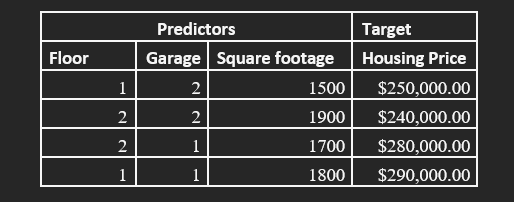

In [ ]:
#problem 3a- Brandon
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# setting up the table
data = pd.DataFrame({
    'floor': [1, 2, 2, 1],
    'garage': [2, 2, 1, 1],
    'square_footage': [1500, 1900, 1700, 1800],
    'housing_price': [250000, 240000, 280000, 290000]
})

# setting up the training and testing data
X = data[['floor', 'garage', 'square_footage']]
y = data['housing_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creating Gradient boosting model
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)

# creating the initial prediction
y_pred = gbm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

initial_est = (250000+240000+280000+290000)/4

print('Mean Squared Error:', mse)

#OR this

print('Initial estimate: ', initial_est)

2.  Complete the following table.

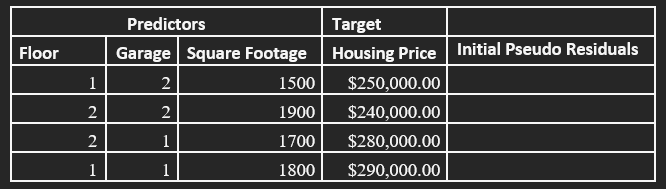




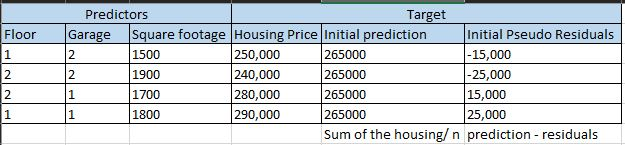

3.	Calculate the squared loss reduction of the split “Floor < 2”

4.	Calculate the squared loss reduction of the split “Garage < 2”

5.	Calculate the squared loss reduction of the split “Square Footage < 1750”

6.	The split selected should be “Floor < 2” ,  “Garage < 2”, or “Square Footage < 1750”?



In [ ]:
# 3. Calculate the squared loss reduction of the split “Floor < 2”

squared_loss_before_split = 0.5 * ((250000-265000)**2 + (240000-265000)**2 + (280000-265000)**2 + (290000-265000)**2) / 2.266666666666667


print('Squared loss reduction of the split “Floor < 2:', squared_loss_before_split  )

In [ ]:
#3bc-3e - Brandon
#3f- Jeremy


3f) Should the split be “Floor < 2”,  “Garage < 2”, or “Square Footage < 1750”?

Garage < 2 since this split has the highest squared loss reduction value

7. Assume that the component tree is:


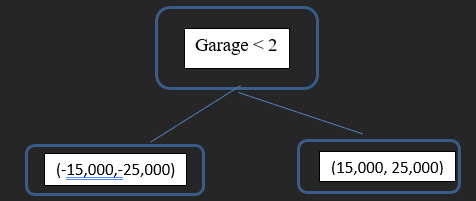

What is the fitted value for each terminate node?




(-15000 + -25000)/2 = -20,000
(15,000 + 20,000)/2 = 20,000

8. 	Find the fitted value for the tree if the learning rate is 0.1 by complete the following table.



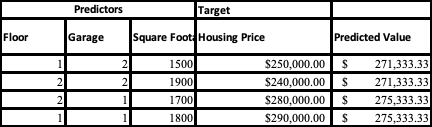

9. Add the residual column of the tree in Part (i) if the learning rate is 0.1 by adding a residual column.

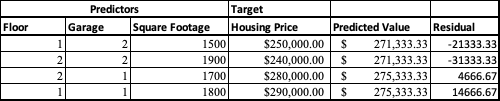
10. Making Prediction of the following case: “Floor =1, Garage = 2, and Square footage = 1600”.

In [ ]:
#3j - Jeremy
init_est = gbm.init_.predict(X_train)[0]
lr = 0.1
upd_res = -21333.33
fvt = 20000

result = init_est + (lr*fvt) + (lr * upd_res)

print('The predicted value is', result)